In [1]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
import pandas as pd 
import numpy as np 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from IPython.display import display
from matplotlib.pyplot import figure, show
from numpy import arange, sin, pi
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.svm import SVC

C:\Users\toki__000\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#load csv file into data frame
animal_df = pd.read_csv('train.csv')
animal_df.shape

(26729, 10)

In [3]:
#drop animalID
animal_df.drop(['AnimalID', 'OutcomeSubtype'], axis=1, inplace=True)
animal_df.shape

(26729, 8)

In [4]:
#keep only data for cats
animal_df = animal_df[~animal_df['AnimalType'].isin(['Dog'])]
animal_df.shape

(11134, 8)

In [5]:
# Giving numerical values to our label
def categorical_to_numeric(x):
    if x == 'Return_to_owner':
        return 0
    elif x == 'Euthanasia':
        return 1
    elif x == 'Adoption':
        return 2
    elif x == 'Transfer':
        return 3
    
animal_df['OutcomeType'] = animal_df['OutcomeType'].apply(categorical_to_numeric).astype(np.float32)
animal_df.head()

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
1,Emily,2013-10-13 12:44:00,1.0,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
3,NaN,2014-07-11 19:09:00,3.0,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
6,Jimmy,2015-03-28 13:11:00,3.0,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,NaN,2015-04-30 17:02:00,3.0,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
10,NaN,2013-12-05 15:50:00,3.0,Cat,Unknown,2 years,Domestic Shorthair Mix,Black


In [6]:
#Convert date time to single columns for year, month, day
datetime = pd.to_datetime(animal_df['DateTime']).dt
animal_df['Year'] = datetime.year
animal_df['Month'] = datetime.month
animal_df['Day'] = datetime.day
animal_df.drop(['DateTime', 'AnimalType'], axis=1, inplace=True)
animal_df.head()

,Name,OutcomeType,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Month,Day
1,Emily,1.0,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2013,10,13
3,NaN,3.0,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,2014,7,11
6,Jimmy,3.0,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,2015,3,28
7,NaN,3.0,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,2015,4,30
10,NaN,3.0,Unknown,2 years,Domestic Shorthair Mix,Black,2013,12,5


In [7]:
# fill in the NaN with 0s
animal_df['Name'] = animal_df['Name'].fillna(0)

# change names to numeric values
for names in animal_df['Name']:
    if isinstance(names, str) and not 0:
        animal_df['Name'].replace(names, '1', inplace=True)
animal_df['Name'] = animal_df['Name'].astype(int)
animal_df.dropna(inplace= True)
animal_df.head()

,Name,OutcomeType,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Month,Day
1,1,1.0,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2013,10,13
3,0,3.0,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,2014,7,11
6,1,3.0,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,2015,3,28
7,0,3.0,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,2015,4,30
10,0,3.0,Unknown,2 years,Domestic Shorthair Mix,Black,2013,12,5


In [8]:
#Convert age to weeks
def change_year_month_to_weeks(x):
    count, parse_age = x.split(" ")
    if parse_age == 'month':
        return int(4)
    elif parse_age == 'months':
        return 4 * int(count)
    elif parse_age == 'year':
        return int(52)
    elif parse_age == 'years':
        return 52 * int(count)
    elif parse_age == 'week':
        return int(count)
    elif parse_age == 'weeks':
        return int(count)
    
animal_df['AgeuponOutcome'] = animal_df['AgeuponOutcome'].apply(change_year_month_to_weeks).astype(np.float32)

animal_df.head()

,Name,OutcomeType,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Month,Day
1,1,1.0,Spayed Female,52.0,Domestic Shorthair Mix,Cream Tabby,2013,10,13
3,0,3.0,Intact Male,3.0,Domestic Shorthair Mix,Blue Cream,2014,7,11
6,1,3.0,Intact Male,3.0,Domestic Shorthair Mix,Blue Tabby,2015,3,28
7,0,3.0,Unknown,3.0,Domestic Shorthair Mix,Brown Tabby,2015,4,30
10,0,3.0,Unknown,104.0,Domestic Shorthair Mix,Black,2013,12,5


In [9]:
#ONE HOT ENCODE categorical data
to_convert = ['SexuponOutcome', 'Breed', 'Color']

for col in to_convert:
    dummies = pd.get_dummies(animal_df[col])
    animal_df[dummies.columns] = dummies
    
animal_df.shape

(10970, 220)

In [11]:
animal_df.dropna(inplace = True)

#show any null values left
print(animal_df.isnull().sum())

Name                      0
OutcomeType               0
SexuponOutcome            0
AgeuponOutcome            0
Breed                     0
Color                     0
Year                      0
Month                     0
Day                       0
Intact Female             0
Intact Male               0
Neutered Male             0
Spayed Female             0
Unknown                   0
Abyssinian Mix            0
American Shorthair Mix    0
Angora Mix                0
Balinese Mix              0
Bengal                    0
Bengal Mix                0
Bombay Mix                0
British Shorthair         0
British Shorthair Mix     0
Burmese                   0
Cornish Rex Mix           0
Cymric Mix                0
Devon Rex                 0
Devon Rex Mix             0
Domestic Longhair         0
Domestic Longhair Mix     0
                         ..
Tortie Point/White        0
Tortie/Black              0
Tortie/Black Smoke        0
Tortie/Blue Cream         0
Tortie/Brown        

In [12]:
y = animal_df['OutcomeType']

y.shape

(10670,)

In [13]:
# Dropping Non-numerical columns and our label column:
animal_df.drop(['SexuponOutcome','OutcomeType','Breed','Color'], axis=1, inplace=True)

X = animal_df

X.head()

,Name,AgeuponOutcome,Year,Month,Day,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown,...,White/Cream,White/Cream Tabby,White/Flame Point,White/Gray,White/Gray Tabby,White/Lynx Point,White/Orange,White/Orange Tabby,White/White,White/Yellow
1,1,52.0,2013,10,13,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3.0,2014,7,11,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,3.0,2015,3,28,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,3.0,2015,4,30,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,0,104.0,2013,12,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Splitting the dataset into testing and training:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

print("X_Train size: " + str(X_train.shape))
print("y_train size: " + str(y_train.shape))
print("X_Test size: " + str(X_test.shape))
print("y_test size: " + str(y_test.shape))

X_Train size: (8536, 216)
y_train size: (8536,)
X_Test size: (2134, 216)
y_test size: (2134,)


In [15]:
#Instantiated Random Forest Classifier
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)
# Training on the training set:
my_RandomForest.fit(X_train, y_train)
# Testing on the testing set:
y_predict_rf = my_RandomForest.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_predict_rf)

print("Random Forest accuracy: " + str(rf_accuracy))

Random Forest accuracy: 0.748359887535


In [16]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Numpy perdictions:

get_prob = my_RandomForest.predict_proba(X_test)
print("Perdictions from Random Forest: ")
print(y_predict_rf)

print("As a percent probablity: ")
display(y_predict_rf[0:5])

logloss_score = metrics.log_loss(y_test, get_prob)

# print("Y_test: " + str(y_test.shape))

# print("Y_predict: " + str(y_predict_rf.shape))

print("Log Loss score: " + str(logloss_score))

Perdictions from Random Forest: 
[ 3.  3.  3. ...,  2.  3.  3.]
As a percent probablity: 


array([ 3.,  3.,  3.,  3.,  3.], dtype=float32)

Log Loss score: 1.56086448987


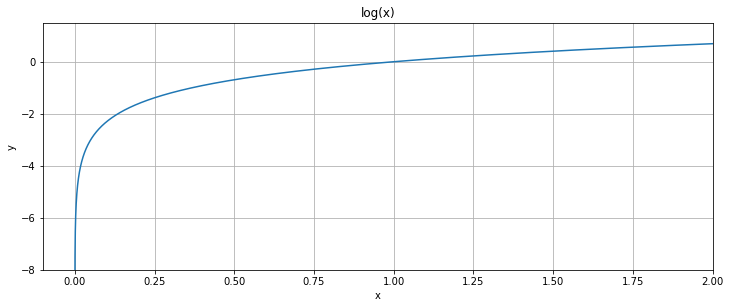

In [17]:
t = arange(1e-5, 5.0, 0.00001)

graph = figure(1, figsize=(12,10))

axis = graph.add_subplot(211)

axis.plot(t, np.log(t))

axis.grid(True)

axis.set_ylim(-8,1.5)
axis.set_xlim(-0.1,2)
axis.set_xlabel('x')
axis.set_ylabel('y')
axis.set_title('log(x)')

In [18]:
# Testing out KNN Classifier on Dog Data up 10 neighbors:
for i in range(1, 11):
    knn_animal = KNeighborsClassifier(n_neighbors = i)
    knn_animal.fit(X_train, y_train)
    y_predict_knn = knn_animal.predict(X_test)

    knn_accuracy = accuracy_score(y_test, y_predict_knn)

    print("KNN Accuracy for  " + str(i) + " neighbors " + str(knn_accuracy))

KNN Accuracy for  1 neighbors 0.674789128397
KNN Accuracy for  2 neighbors 0.637300843486
KNN Accuracy for  3 neighbors 0.680880974695
KNN Accuracy for  4 neighbors 0.687910028116
KNN Accuracy for  5 neighbors 0.684629803187
KNN Accuracy for  6 neighbors 0.685098406748
KNN Accuracy for  7 neighbors 0.691658856607
KNN Accuracy for  8 neighbors 0.694001874414
KNN Accuracy for  9 neighbors 0.690721649485
KNN Accuracy for  10 neighbors 0.688847235239


In [19]:
decision_tree_animal = DecisionTreeClassifier()
decision_tree_animal.fit(X_train, y_train)
y_predict_decision_tree = decision_tree_animal.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_predict_decision_tree)

print("Decision Tree Accuracy: " + str(dt_accuracy))

Decision Tree Accuracy: 0.698687910028


In [20]:
my_AdaBoost = AdaBoostClassifier(n_estimators = 19,random_state=2)
my_AdaBoost.fit(X_train, y_train)
y_predict_ada = my_AdaBoost.predict(X_test)
score_ada = accuracy_score(y_test, y_predict_ada)

# calculating the final accuracy of AdaBoost Classifier
print("AdaBoost Classifier Accuracy: " + str(score_ada))

AdaBoost Classifier Accuracy: 0.740862230553


In [21]:
my_ANN = MLPClassifier(hidden_layer_sizes=(100,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)

# Training on Training set
my_ANN.fit(X_train, y_train)

# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann)

print("ANN Accuracy: " + str(score_ann))

ANN Accuracy: 0.748828491097


In [22]:
# Instantiating Non_Linear SVM
my_nonLinear_SVM = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1, probability=True)

my_nonLinear_SVM.fit (X_train, y_train)

# Testing on the testing set:
y_predict_nlsvm = my_nonLinear_SVM.predict(X_test)

# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_nlsvm = accuracy_score(y_test, y_predict_nlsvm)

print("Accuracy of Non-Linear SVM: " + str(score_nlsvm))

Accuracy of Non-Linear SVM: 0.701030927835
